# Machine Learning analysis
  
Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

### 2.1 Reading the data CSV
rubric={accuracy:3}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [1]:
spotify_df = pd.read_csv('data.csv', index_col = 0 )
spotify_df

NameError: name 'pd' is not defined

<br><br>

### 2.2 Data splitting 
rubric={accuracy:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [15]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=123)
print(train_df.shape)
print(test_df.shape)

(1613, 16)
(404, 16)


We have 1613 examples in training data, 404 examples in test data.

Yes, the difference between the features correlate to two target classes are used to distinguish whether the example should go to either one of the target classes. If two histograms are identical, no difference can be found, hence no useful information to distinguish between to target classes.

### 2.7 Which columns to include? 
rubric={reasoning:4}

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

`artist` can be useful in the prediction while `song_title` may be less useful. As many listeners may like the songs because of the artist, some popular singer like Taylor Swift, could be more favorable these days comparing to some older generation artists. However, song title may not be critical for user to like or dislike a song.  
Technically, DecisionTreeClassifier can handle text like categorical labels by treating them as `numeric`. But it will be difficulty to use since both `song_title` and `artist` are free text, which is not categorical labels with limited categories. The possible combinations are huge, hence hard to use them in the tree model.

<br><br><br><br>

## Exercise 3: Data splitting and model building <a name="3"></a>
<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

In Exercise 2.2, we used `scikit-learn`'s [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data, which shuffles the data before splitting. In this exercise, we will try to convince ourselves the importance of shuffling before splitting. 

The starter code below creates `X` and `y` for you to use in the following questions. In the exercises below, you'll have to calculate `train` and `test` scores several times. To make it a bit easy for you, I am providing you a function `fit_and_report` below, which fits a model and prints train and test scores. Feel free to use this function in the following exercises. 

In [ ]:
X = spotify_df.drop(columns=["song_title", "artist", "target"])
y = spotify_df["target"]

In [ ]:
def fit_and_report(model, X_train, y_train, X_test, y_test):
    """
    Fits a given model on the training data and prints train and
    test scores.

    Parameters
    ----------
    model: sklearn classifier model
        The sklearn model
    X_train: numpy.ndarray
        The X_train part of the data
    y_train: numpy.ndarray
        The y_train part of the data
    X_test: numpy.ndarray
        The X_train part of the data
    y_test: numpy.ndarray
        The y_test part of the data

    Returns
    -------
        None
    """
    model.fit(X_train, y_train)
    print("Training score: %0.3f" % (model.score(X_train, y_train)))
    print("Test score: %0.3f" % (model.score(X_test, y_test)))

<br><br>

### 3.1 Splitting without shuffling 
rubric={accuracy:4}

The dataset has total 2,017 examples. 

**Your tasks:**  

1. Split `X` and `y` as follows: 
    - Use the first 1500 rows as the train set (`X_train` and `y_train`)
    - Use the remaining rows as the test set (`X_test` and `y_test`)
2. Train `DummyClassifier` on the train set and score it on the train and test sets.
3. Now train the `DecisionTreeClassifier` with `random_state=123` on the train set and score it on the train and test sets. 

> You may use the `fit_and_report` function above to `fit` and `score` models.  

> If parameter values are not specified explicitly, you may use the default values. 

In [ ]:
X_train, X_test = X.iloc[:1500,:], X.iloc[1500:,:]
y_train, y_test = y.iloc[:1500,], y.iloc[1500:,]

print('DummyClassifier:')
model_dummy = DummyClassifier()
fit_and_report(model_dummy, X_train, y_train, X_test, y_test)

print('DecisionTreeClassifier:')
model_tree = DecisionTreeClassifier(random_state=123)
fit_and_report(model_tree, X_train, y_train, X_test, y_test)


DummyClassifier:
Training score: 0.680
Test score: 0.000
DecisionTreeClassifier:
Training score: 0.998
Test score: 0.491


<br><br>

### 3.2 Splitting with shuffling 
rubric={accuracy:4}

The problem in the previous exercise was that we did not shuffle the training examples before splitting. Let's see if shuffling the data improves the test score.

**Your tasks:** 

1. Run the starter code below to shuffle `X` and `y`. 
2. Split the **shuffled data** as follows: 
    - Use the first 1500 rows as the train set 
    - Use the remaining rows as the test set
3. Train `DummyClassifier` on the train set and score it on the train and test sets.    
4. Now train the `DecisionTreeClassifier` with `random_state=123` on the train set and score it on the train and test sets. 

In [ ]:
X_shuffled = X.reindex(np.random.permutation(X.index))
y_shuffled = y.reindex(X_shuffled.index)

In [ ]:
X_train, X_test = X_shuffled.iloc[:1500,:], X_shuffled.iloc[1500:,:]
y_train, y_test = y_shuffled.iloc[:1500,], y_shuffled.iloc[1500:,]

print('DummyClassifier:')
model_dummy = DummyClassifier()
fit_and_report(model_dummy, X_train, y_train, X_test, y_test)

print('DecisionTreeClassifier:')
model_tree = DecisionTreeClassifier(random_state=123)
fit_and_report(model_tree, X_train, y_train, X_test, y_test)


DummyClassifier:
Training score: 0.510
Test score: 0.493
DecisionTreeClassifier:
Training score: 0.999
Test score: 0.662


<br><br>

### 3.3 Splitting with `train_test_split` 
rubric={accuracy:4}

**Your tasks:** 

1. Now split the Spotify dataset into a 80% train and 20% test using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`.
2. Train `DummyClassifier` on the train set and score it on the train and test sets.    
3. Train the `DecisionTreeClassifier` with `random_state=123` on the train set and score it on the train and test sets. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print('DummyClassifier:')
model_dummy = DummyClassifier()
fit_and_report(model_dummy, X_train, y_train, X_test, y_test)

print('DecisionTreeClassifier:')
model_tree = DecisionTreeClassifier(random_state=123)
fit_and_report(model_tree, X_train, y_train, X_test, y_test)

DummyClassifier:
Training score: 0.508
Test score: 0.498
DecisionTreeClassifier:
Training score: 0.999
Test score: 0.688


<br><br>

### 3.4 Discussion
rubric={reasoning:4}

**Your tasks:** 
1. Why do you think we got a lower test accuracy on the Spotify Song Attributes datasets when we did not shuffle the data before splitting compared to when we shuffled the data before splitting?  
2. Do you expect `DummyClassifier` to be sensitive to data shuffling and splitting? Why or why not?     

1. When a dataset is provided, it might be sorted, which makes the data has bias if we do not pick our data randomly. We want a set of training data that can represent the whole data set, therefore, shuffling is necessary.
2. Yes, it is very sensitive to shuffling and splitting. Since DummyClassifier only look at the frequency of y, if y is sorted, or not randomly distributed, the model will have bias. In our example, most of the ones are at the top of the data set while zeros at the bottom, when we count the training data without shuffle, naturally the model will predict 1 for all cases, and fail when we apply it to test data.

In [ ]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
y.tail(5)

2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, dtype: int64

<br><br>

### 3.5 Cross-validation
rubric={accuracy:4}

**Your tasks:** 

Carry out 10-fold cross validation using `cross_validate` on `X_train` and `y_train` from Exercise 3.3 by passing `return_train_score=True`. Display the results as a pandas dataframe. 

In [ ]:
scores = pd.DataFrame(cross_validate(model_tree, X_train, y_train, cv=10, return_train_score=True))
scores

,fit_time,score_time,test_score,train_score
0,0.018726,0.002628,0.722222,0.999311
1,0.019385,0.003403,0.660494,1.000000
2,0.016185,0.001994,0.660494,0.999311
3,0.017209,0.001832,0.677019,1.000000
4,0.015630,0.001782,0.695652,0.999311
5,0.016298,0.001808,0.652174,0.999311
6,0.014877,0.001813,0.658385,0.999311
7,0.014943,0.001601,0.608696,0.999311
8,0.014754,0.002051,0.683230,0.999311
9,0.015762,0.001740,0.695652,0.999311


<br><br>

### 3.6 Examining cross-validation scores
rubric={reasoning:5}

**Your tasks:** 
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences. 

1. Not trustworthy. The range of validation score is large, from 0.62 to 0.75 (different > 0.12), which indicates that by changing the combination of validation and training data, it can vary. It is not trustworthy because of the steadiness.

In [ ]:
scores['test_score'].max()-scores['test_score'].min()

0.11352657004830913

In [ ]:
scores_melt = scores.melt(
    id_vars=["fit_time", "score_time"], var_name="score_type", value_name="score"
).query('score_type == "test_score"')
test_score_boxplot = (
    alt.Chart(scores_melt)
    .mark_boxplot()
    .encode(
        y="score_type",
        x=alt.X("score", scale=alt.Scale(domain=[0.6, 0.8])),
        color="score_type",
    )
)
test_score_boxplot

alt.Chart(...)

2. Yes, the difference between training mean and cross-validation mean is large, while training mean is close to 1, the cross-validation mean is only 0.66. It indicates that the model is overfitting.

In [ ]:
scores['test_score'].mean()

0.6714017329959358

In [ ]:
scores['train_score'].mean()

0.9994489408843148

<br><br><br><br>

## Exercise 4: Hyperparameters <a name="4"></a>
<hr>

### 4.1 Train and cross-validation plots
rubric={accuracy:12}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

**Your tasks:**

1. Just to start fresh, split the Spotify dataset into a 80% train and 20% test subset using [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and `random_state=123`.
2. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). 
3. For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
4. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.

> You may use whatever tool you like for plotting. We also have done something similar in lecture 2, and you may adapt that code to answer this question. 

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

<AxesSubplot:xlabel='depth'>

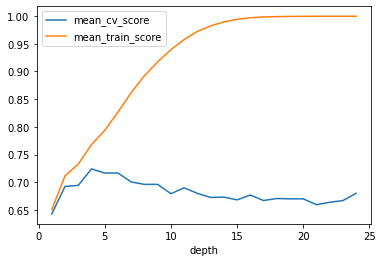

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

result_dict = pd.DataFrame(columns=["depth", "mean_cv_score", "mean_train_score"])
for depth in np.arange(1, 25):
    model = DecisionTreeClassifier(max_depth=depth)
    score = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    result_dict = result_dict.append(
        {
            "depth": depth,
            "mean_cv_score": score["test_score"].mean(),
            "mean_train_score": score["train_score"].mean(),
        },
        ignore_index=True,
    )

result_dict["depth"] = result_dict["depth"].astype("int")
result_dict = result_dict.set_index("depth")
result_dict[["mean_cv_score", "mean_train_score"]].plot()

### 4.2 `max_depth` and the fundamental tradeoff
rubric={reasoning:2}

**Your tasks:**
1. Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. 

For training accuracy, it starts at low accuracy. When `max_depth` increases, training accuracy increases and gets closer to 1. It is because more branches are used to evaluate examples.  
For cross-validation accuracy, it starts at low accuracy where it is similar to training accuracy. When `max_depth` increases, cross-validation accuracy increases. However, at depth equal to 4, it turns and start decreasing. The differences between training accuracy and cross-validation accuracy also grow after that.

In [ ]:
result_dict.head()

,mean_cv_score,mean_train_score
depth,,
1,0.642926,0.650686
2,0.692520,0.711718
3,0.694387,0.732797
4,0.724139,0.768066
5,0.716678,0.793691


<br><br>

### 4.3 Picking the best value for `max_depth`
rubric={reasoning:3}

**Your tasks:**
1. From these results, what value for `max_depth` would you pick as the optimal value? 

The optimal value of `max_depth` is 4, which has highest cross-validation accuracy and closest to raining accuracy.

<br><br>

### 4.4 Final assessment on the test split 
rubric={accuracy:3}

1. Train a decision tree classifier using the optimal `max_depth` you chose in the previous exercise on the _entire training set_.
2. Compute and display the test score. 

In [ ]:
model_spotify_max4 = DecisionTreeClassifier(max_depth=4)
model_spotify_max4.fit(X_train, y_train)
score_spotify_max4 = model_spotify_max4.score(X_train, y_train)
score_spotify_max4

0.7619342839429635

In [ ]:
print(fit_and_report(model_spotify_max4, X_train, y_train, X_test, y_test))

Training score: 0.762
Test score: 0.678
None


<br><br>

### 4.5 Analysis
rubric={reasoning:5}

1. How do the test scores compare to the cross-validation scores? Briefly discuss. 
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the `max_depth` you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

1. Test scores and cross-validation scores are similar. Both are using the same set of data, while we take the mean of all the cross-validation scores, we also calculate the test scores at once using the full set of training data. Mathematically, the results should be similar.
2. When `max_depth` is high, the model picks up some patterns from the training data that are not real pattern in the training data but random quirks. That way, the model is overfitting and it is not generalized enough to predict new data, hence the low accuracy in validation data. Since validation data is a proxy to test and real life data, the validation accuracy is more important.
3. I think the `max_depth` is generalized enough to be used on other spotify users. `max_depth` controls the tree depth, which is the maximum thresholds and features that we use to identify a user preference of each song. Even though the trained model will not work (i.e. We need the user's personal data to train the model again), the hyper parameter can be similar. It should be enough to identify a personal preference by asking a similar amount of questions to different human by the similar features.